## **<center><font style="color:rgb(100,109,254)">Decision Tree Classification</font> </center>** 
## **<center><font style="color:rgb(100,109,254)">(Ex.01 Play Tennis Example)</font> </center>** 
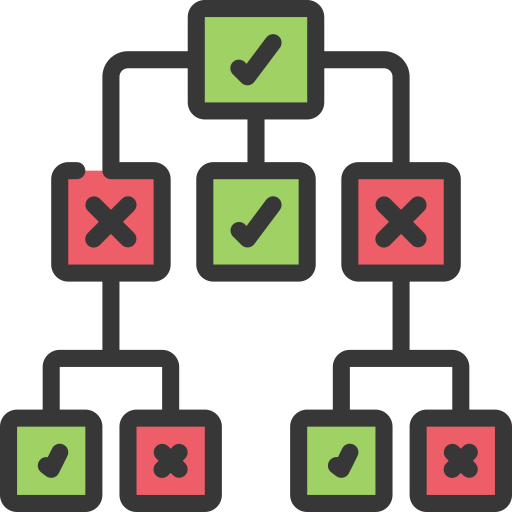

### Entropy

Entropy is defined as the randomness or measuring the disorder of
the information being processed in Machine Learning. Further, in
other words, we can say that entropy is the machine learning metric
that measures the unpredictability or impurity in the system.

## 01. Import Libraries

In [3]:
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt


## 02. Load Dataset

In [5]:
df = pd.read_csv("PlayTennis.csv")
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [6]:
df = df.drop("Temperature", axis=1)

In [7]:
df

,Outlook,Humidity,Wind,Play Tennis
0,Sunny,High,Weak,No
1,Sunny,High,Strong,No
2,Overcast,High,Weak,Yes
3,Rain,High,Weak,Yes
4,Rain,Normal,Weak,Yes
5,Rain,Normal,Strong,No
6,Overcast,Normal,Strong,Yes
7,Sunny,High,Weak,No
8,Sunny,Normal,Weak,Yes
9,Rain,Normal,Weak,Yes


### ML doesn't understand the strings or labels like this so we have to change it to numbers

## 03. Label Encoding 

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
Outlook = LabelEncoder()
print(Outlook)
# Humidity = LabelEncoder()
# Wind = LabelEncoder()
# PlayTennis = LabelEncoder()


LabelEncoder()


In [10]:
df['Outlook'] = Outlook.fit_transform(df['Outlook'])
df['Humidity'] = Outlook.fit_transform(df['Humidity'])
df['Wind'] = Outlook.fit_transform(df['Wind'])
df['Play Tennis'] = Outlook.fit_transform(df['Play Tennis'])

In [11]:
df

,Outlook,Humidity,Wind,Play Tennis
0,2,0,1,0
1,2,0,0,0
2,0,0,1,1
3,1,0,1,1
4,1,1,1,1
5,1,1,0,0
6,0,1,0,1
7,2,0,1,0
8,2,1,1,1
9,1,1,1,1


# 04. X and Y from Dataset

## X

In [12]:
x = df.drop("Play Tennis", axis=1)
x

,Outlook,Humidity,Wind
0,2,0,1
1,2,0,0
2,0,0,1
3,1,0,1
4,1,1,1
5,1,1,0
6,0,1,0
7,2,0,1
8,2,1,1
9,1,1,1


## Y

In [13]:
y = df['Play Tennis']
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play Tennis, dtype: int32

# 05. Split Dataset into Training and Testing Dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=2)

In [16]:
xTrain.shape

(11, 3)

In [17]:
yTrain.shape

(11,)

In [18]:
xTest.shape

(3, 3)

In [19]:
yTest.shape

(3,)

# 06. Import Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')

# 07. Fit the Model

In [21]:
model.fit(xTrain, yTrain)

DecisionTreeClassifier(criterion='entropy')

# 08. Predict Using model

In [25]:
model.predict(x)

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [23]:
yTest

11    1
4     1
5     0
Name: Play Tennis, dtype: int32

# **<font style="color:rgb(200,100,0)">Predict the entire Testing Dataset!</font>** 

In [31]:
pred = model.predict(xTest)

# 09. Accuracy Check

In [29]:
accuracy = model.score(x,y)
accuracy

0.8571428571428571

## **<center><font style="color:rgb(10,200,0)">Accuracy = 85%</font> </center>** 

## 10. Confusion Matrix

In [35]:
import seaborn as sns
from sklearn import metrics

In [33]:
confusionMetrix = metrics.confusion_matrix(yTest, pred)
confusionMetrix

array([[0, 1],
       [1, 1]], dtype=int64)

## 11. Heat Map

Text(0.5, 1.0, 'Accuracy: 85 %')

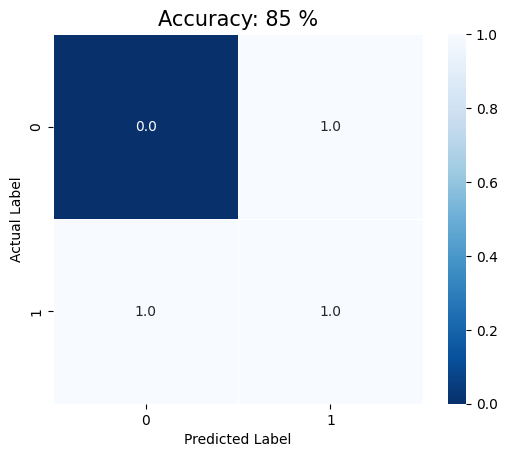

In [36]:
import matplotlib.pyplot as plt
sns.heatmap(confusionMetrix, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title(f"Accuracy: {int(accuracy * 100)} %", size = 15)

[Text(0.6666666666666666, 0.875, 'X[1] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.5, 0.625, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.3333333333333333, 0.375, 'X[2] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

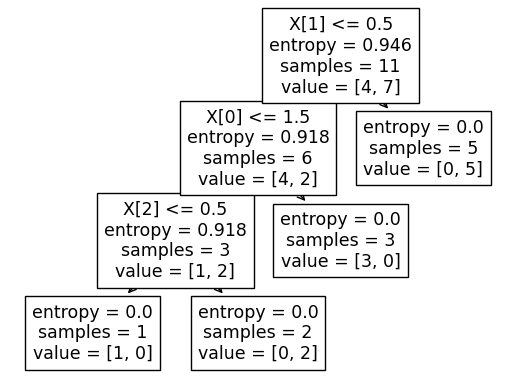

In [27]:
from sklearn import tree

tree.plot_tree(model)

******

# **<center><font style="color:rgb(100,109,254)">(Ex.02 Salary > 100k)</font> </center>** 

## 01. Import Libraries

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 02. Load Dataset

In [29]:
df = pd.read_csv("Salary.csv")
df

,Company,Job,Degree,Salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


### ML doesn't understand the strings or labels like this so we have to change it to numbers

## 03. Label Encoding 

In [30]:
Company = LabelEncoder()

In [31]:
df['Company'] = Company.fit_transform(df['Company'])
df['Job'] = Company.fit_transform(df['Job'])
df['Degree'] = Company.fit_transform(df['Degree'])
df['Salary_more_then_100k'] = Company.fit_transform(df['Salary_more_then_100k'])
df

,Company,Job,Degree,Salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


## 04. X and Y from Dataset


### X

In [32]:
x = df.drop("Salary_more_then_100k", axis=1)
x

,Company,Job,Degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


### Y

In [33]:
y = df['Salary_more_then_100k']
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: Salary_more_then_100k, dtype: int64

## 05. Split Dataset into Training and Testing Dataset

In [34]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=2)

In [36]:
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)



(12, 3) (12,) (4, 3) (4,)


## 06. Import Decision Tree Classifier


In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')

## 07. Fit the Model

In [38]:
model.fit(xTrain, yTrain)

DecisionTreeClassifier(criterion='entropy')

## 08. Predict Using model

In [39]:
model.predict(xTest)
yTest

12    1
4     0
5     1
0     0
Name: Salary_more_then_100k, dtype: int64


# **<font style="color:rgb(200,100,0)">Predict the entire Testing Dataset!</font>** 


In [40]:
pred = model.predict(xTest)

## 09. Accuracy Check


In [41]:
accuracy = model.score(xTest, yTest)
accuracy

0.75